In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("./data/Ana_Health-Tabela_Modelo_Previsao_Churn.csv",skiprows=1)

## Análise Matheus

### Colunas que devo analisar : 

Colunas do  matheus :

'Faltas Acolhimento', 'Qde Perfis de Pagamento Inativos', 'Datas Prescrição', 'Valor Total Inadimplência', 'id_continuity_pf', 'add_time', 'Qde Respostas WHOQOL', 'Datas Psicoterapia', 'Cancelamentos Acolhimento', 'won_time', 'Canal de Preferência', 'Ambiental'

In [4]:
filtro_minhas_colunas = ['Faltas Acolhimento', 'Qde Perfis de Pagamento Inativos', 'Datas Prescrição', 'Valor Total Inadimplência', 'id_continuity_pf', 'add_time', 'Qde Respostas WHOQOL', 'Datas Psicoterapia', 'Cancelamentos Acolhimento', 'won_time', 'Canal de Preferência', 'Ambiental']

df_matheus = df[filtro_minhas_colunas]
df_matheus.head()

,Faltas Acolhimento,Qde Perfis de Pagamento Inativos,Datas Prescrição,Valor Total Inadimplência,id_continuity_pf,add_time,Qde Respostas WHOQOL,Datas Psicoterapia,Cancelamentos Acolhimento,won_time,Canal de Preferência,Ambiental
0,False,False,False,NaN,NaN,2021-09-16 18:14:49,3.0,NaN,False,2022-04-29 03:00:00,NaN,"4,0; 4,3; 4,0"
1,False,False,False,NaN,339.0,2021-09-16 18:15:46,NaN,NaN,False,NaN,NaN,NaN
2,False,False,False,NaN,339.0,NaN,NaN,NaN,False,NaN,NaN,NaN
3,False,False,False,NaN,339.0,NaN,NaN,NaN,False,NaN,NaN,NaN
4,False,False,False,NaN,339.0,NaN,NaN,NaN,False,NaN,NaN,NaN


In [6]:
df_matheus.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Valor Total Inadimplência,252.0,24.182738,76.092674,0.0,0.0,0.0,0.0,616.0
id_continuity_pf,395.0,338.878481,0.327144,338.0,339.0,339.0,339.0,339.0
Qde Respostas WHOQOL,898.0,1.204900,0.526127,1.0,1.0,1.0,1.0,7.0
Canal de Preferência,384.0,244.635417,25.618050,238.0,239.0,239.0,239.0,360.0


In [15]:
df_matheus.dtypes

Faltas Acolhimento                     bool
Qde Perfis de Pagamento Inativos       bool
Datas Prescrição                       bool
Valor Total Inadimplência           float64
id_continuity_pf                    float64
add_time                             object
Qde Respostas WHOQOL                float64
Datas Psicoterapia                   object
Cancelamentos Acolhimento              bool
won_time                             object
Canal de Preferência                float64
Ambiental                            object
dtype: object

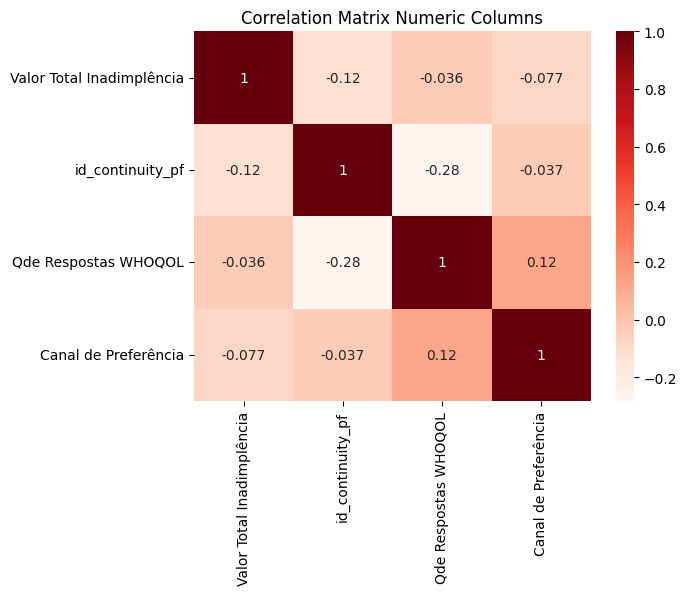

In [16]:
correlation_matrix_numeric_columns = df_matheus.select_dtypes(include=[np.number]).corr()
plt.figure()
sns.heatmap(correlation_matrix_numeric_columns, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Matrix Numeric Columns')
plt.show()

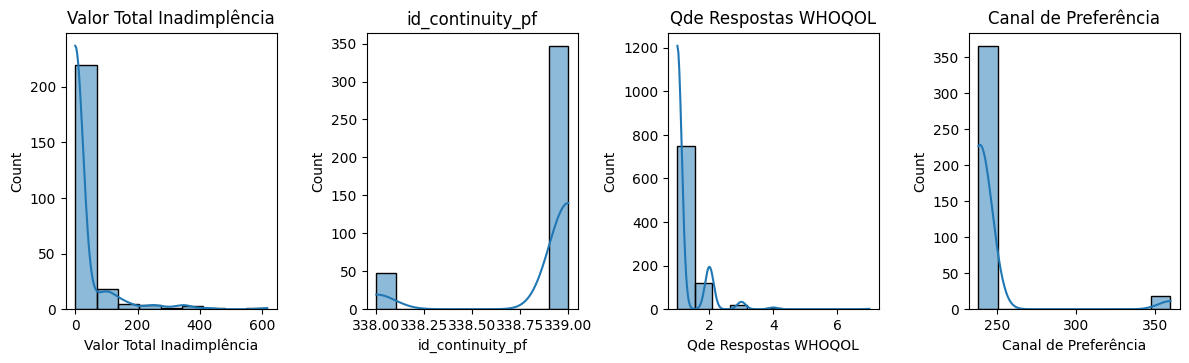

In [13]:
colunas_numericas = df_matheus.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
for i, coluna in enumerate(colunas_numericas):
    plt.subplot(3, 4, i+1)
    sns.histplot(df_matheus[coluna], kde=True)
    plt.title(coluna)
plt.tight_layout()

C:\Users\code\AppData\Local\Temp\ipykernel_7576\5407146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matheus['won_time'] = pd.to_datetime(df_matheus['won_time'], errors='coerce')
C:\Users\code\AppData\Local\Temp\ipykernel_7576\5407146.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matheus['year_won_time'] = df_matheus['won_time'].dt.year


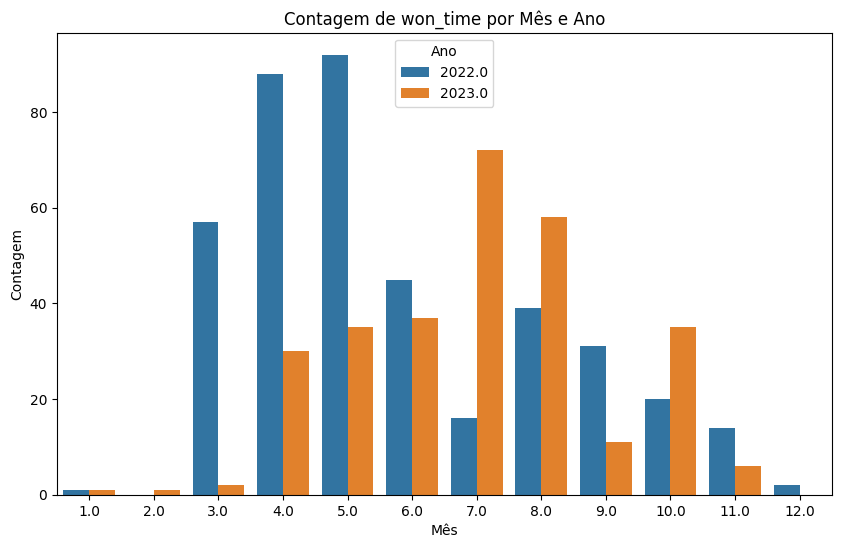

In [21]:
#COnverter won_time  para data 
df_matheus['won_time'] = pd.to_datetime(df_matheus['won_time'], errors='coerce')
df_matheus['won_time'].head()

# Criar coluna de ano
df_matheus['year_won_time'] = df_matheus['won_time'].dt.year

# Plotar gráfico de barras separado por ano
plt.figure(figsize=(10, 6))  # Definir tamanho da figura

# Usar seaborn para criar facetas
sns.countplot(x=df_matheus['won_time'].dt.month, hue=df_matheus['year_won_time'])

# Adicionar rótulos e título
plt.xlabel('Mês')
plt.ylabel('Contagem')
plt.title('Contagem de won_time por Mês e Ano')
plt.legend(title='Ano')

# Mostrar o gráfico
plt.show()
